In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x = dataset.iloc[:,[3,4]]

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
import scipy.cluster.hierarchy as sch

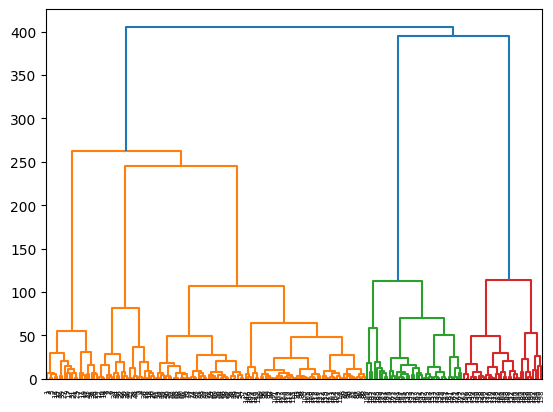

In [9]:
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))

In [10]:
#from the above graph select the bigger cluster

In [11]:
from sklearn.cluster import AgglomerativeClustering
clusmodel = AgglomerativeClustering(n_clusters=5)
label = clusmodel.fit_predict(x)

In [12]:
supervised = pd.DataFrame(dataset)

In [13]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
supervised['Cluster_group']= label

In [15]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


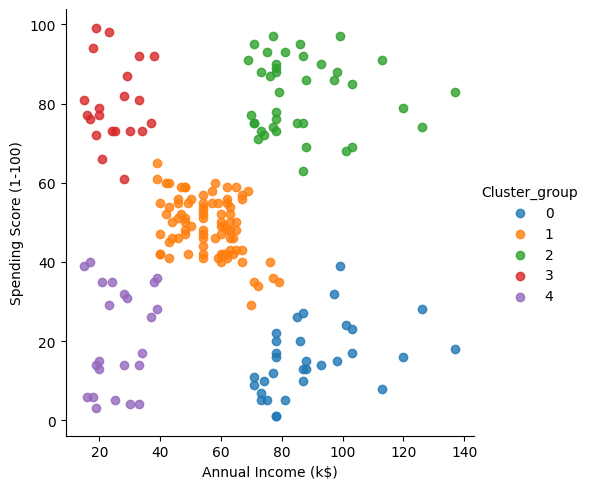

In [16]:
import seaborn as sns
facets = sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True)